In [1]:
from dnn_app_utils_v3 import load_data, print_mislabeled_images
from deep_neural_network import neural_network
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

In [2]:
#Functions to be used later

def show_image(X, Y, index, classes):
    plt.imshow(X[index])
    print ("y = " + str(Y[0,index]) + ". It's a " + classes[Y[0,index]].decode("utf-8") +  " picture.")
    plt.show()
    
def flatten(dataset):
    dataset = dataset.reshape(dataset.shape[0],-1).T
    return dataset

def show_costs(costs, learning_rate):
    iterations = [i * 100 for i, each in enumerate(costs)]
    plt.plot(iterations,costs)
    plt.xlim(min(iterations),max(iterations))
    plt.xlabel('Iterations')
    plt.ylim(0,1)
    plt.ylabel('Cost')
    plt.title('Learning rate = {}'.format(learning_rate))
    plt.show()
    
def model(train_x, train_y, test_x, test_y, layer_dims, learning_rate, num_iterations, initialization = 'standard', keep_prob = 1):
    np.random.seed(1)
    nn = neural_network(layer_dims, initialization = initialization, keep_prob = keep_prob)
    print(nn)

    costs = nn.train(train_x, train_y, learning_rate = learning_rate, num_iterations = num_iterations, print_costs=True, print_interval=100)

    show_costs(costs, learning_rate=learning_rate)

    train_predict = nn.predict(train_x)
    test_predict = nn.predict(test_x)

    neural_network.print_accuracy(train_predict,train_y,"Train")
    neural_network.print_accuracy(test_predict,test_y,'Test')
    
    return nn

y = 0. It's a non-cat picture.


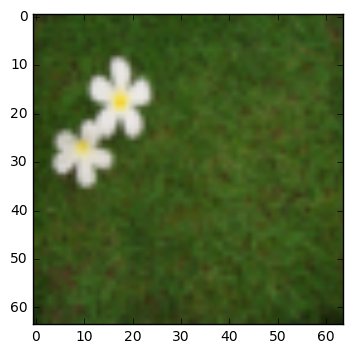

In [3]:
show_image(train_x_orig,train_y,6,classes)

In [4]:
train_x = flatten(train_x_orig)/255
test_x = flatten(test_x_orig)/255

print(train_x.shape)
print(test_x.shape)

(12288, 209)
(12288, 50)


# 2 layer NN

Layer: 1
	W.shape = (7, 12288)
	b.shape = (7, 1)
	activation function = relu
	keep_prob: 1
	lambda: 0

Layer: 2
	W.shape = (1, 7)
	b.shape = (1, 1)
	activation function = sigmoid
	keep_prob: 1
	lambda: 0


Cost after iteration 0: 0.693049735659989
Cost after iteration 100: 0.6464320953428849
Cost after iteration 200: 0.6325140647912677
Cost after iteration 300: 0.6015024920354665
Cost after iteration 400: 0.5601966311605747
Cost after iteration 500: 0.5158304772764729
Cost after iteration 600: 0.47549013139433255
Cost after iteration 700: 0.4339163151225749
Cost after iteration 800: 0.4007977536203886
Cost after iteration 900: 0.3580705011323798
Cost after iteration 1000: 0.3394281538366413
Cost after iteration 1100: 0.3052753636196265
Cost after iteration 1200: 0.27491377282130147
Cost after iteration 1300: 0.24681768210614824
Cost after iteration 1400: 0.1985073503746611
Cost after iteration 1500: 0.17448318112556593
Cost after iteration 1600: 0.1708076297809661
Cost after iteration 

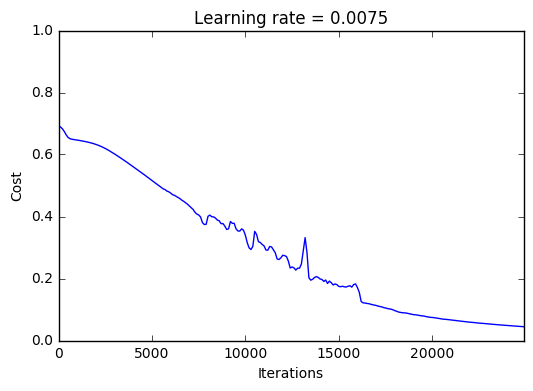

Train accuracy: 100.00%
Test accuracy: 72.00%


In [5]:
layers_dims = [12288,7,1]
two_layer_nn = model(train_x, train_y, test_x, test_y, layers_dims, learning_rate = 0.0075, num_iterations = 2500)

# 4 layer NN with standard initialization

Layer: 1
	W.shape = (20, 12288)
	b.shape = (20, 1)
	activation function = relu
	keep_prob: 1
	lambda: 0

Layer: 2
	W.shape = (7, 20)
	b.shape = (7, 1)
	activation function = relu
	keep_prob: 1
	lambda: 0

Layer: 3
	W.shape = (5, 7)
	b.shape = (5, 1)
	activation function = relu
	keep_prob: 1
	lambda: 0

Layer: 4
	W.shape = (1, 5)
	b.shape = (1, 1)
	activation function = sigmoid
	keep_prob: 1
	lambda: 0


Cost after iteration 0: 0.6931489045172448
Cost after iteration 100: 0.6780101696342276
Cost after iteration 200: 0.6675987898426476
Cost after iteration 300: 0.6604207986997239
Cost after iteration 400: 0.6554567864060155
Cost after iteration 500: 0.6520125406245427
Cost after iteration 600: 0.6496150308724233
Cost after iteration 700: 0.6479410854035669
Cost after iteration 800: 0.6467691149981919
Cost after iteration 900: 0.6459465764921428
Cost after iteration 1000: 0.6453680393441446
Cost after iteration 1100: 0.6449603576684058
Cost after iteration 1200: 0.6446726073384453
Cost af

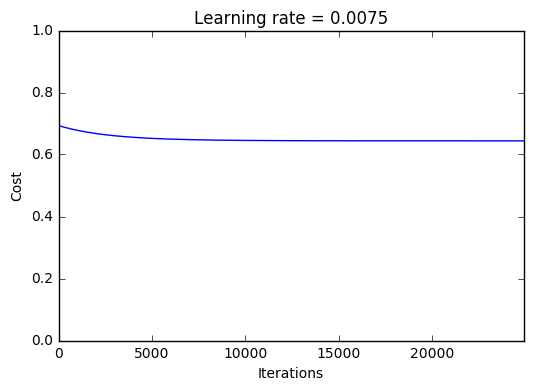

Train accuracy: 65.55%
Test accuracy: 34.00%


In [6]:
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model
four_layer_nn = model(train_x, train_y, test_x, test_y, layers_dims, learning_rate = 0.0075, num_iterations = 2500, initialization='standard')

My 4 layer NN fails to converge with initializing weights with np.random.randn() * 0.01

# 4 layer NN with Xavier initialization

Layer: 1
	W.shape = (20, 12288)
	b.shape = (20, 1)
	activation function = relu
	keep_prob: 1
	lambda: 0

Layer: 2
	W.shape = (7, 20)
	b.shape = (7, 1)
	activation function = relu
	keep_prob: 1
	lambda: 0

Layer: 3
	W.shape = (5, 7)
	b.shape = (5, 1)
	activation function = relu
	keep_prob: 1
	lambda: 0

Layer: 4
	W.shape = (1, 5)
	b.shape = (1, 1)
	activation function = sigmoid
	keep_prob: 1
	lambda: 0


Cost after iteration 0: 0.7717493284237686
Cost after iteration 100: 0.6720534400822913
Cost after iteration 200: 0.6482632048575212
Cost after iteration 300: 0.6115068816101354
Cost after iteration 400: 0.567047326836611
Cost after iteration 500: 0.5401376634547801
Cost after iteration 600: 0.5279299569455267
Cost after iteration 700: 0.46547737717668514
Cost after iteration 800: 0.369125852495928
Cost after iteration 900: 0.39174697434805344
Cost after iteration 1000: 0.31518698886006163
Cost after iteration 1100: 0.2726998441789385
Cost after iteration 1200: 0.23741853400268131
Cost 

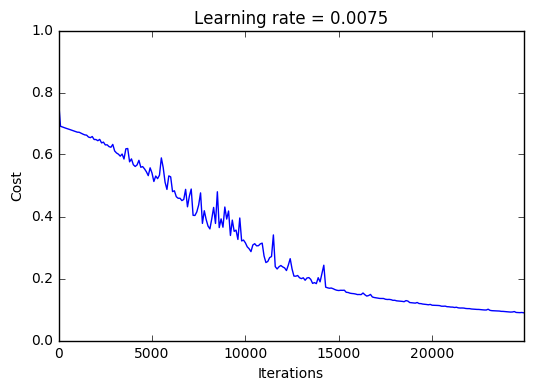

Train accuracy: 98.56%
Test accuracy: 80.00%


In [7]:
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model
four_layer_nn = model(train_x, train_y, test_x, test_y, layers_dims, learning_rate = 0.0075, num_iterations = 2500, initialization='xavier')

Using Xavier initialization, my 4 layer NN converges nicely and has boost in performance from 2-layer NN (8% increased absolute accuracy from 72 to 80%)

# 4 layer NN with He initialization

Layer: 1
	W.shape = (20, 12288)
	b.shape = (20, 1)
	activation function = relu
	keep_prob: 1
	lambda: 0

Layer: 2
	W.shape = (7, 20)
	b.shape = (7, 1)
	activation function = relu
	keep_prob: 1
	lambda: 0

Layer: 3
	W.shape = (5, 7)
	b.shape = (5, 1)
	activation function = relu
	keep_prob: 1
	lambda: 0

Layer: 4
	W.shape = (1, 5)
	b.shape = (1, 1)
	activation function = sigmoid
	keep_prob: 1
	lambda: 0


Cost after iteration 0: 1.2081250106003225
Cost after iteration 100: 0.6740577413973854
Cost after iteration 200: 0.6625049864829948
Cost after iteration 300: 0.6552334472046671
Cost after iteration 400: 0.6504891112622437
Cost after iteration 500: 0.6473194475269372
Cost after iteration 600: 0.6449422527912865
Cost after iteration 700: 0.6430979384805493
Cost after iteration 800: 0.6414454339232504
Cost after iteration 900: 0.6398930793986607
Cost after iteration 1000: 0.6374058448197395
Cost after iteration 1100: 0.6353225187839249
Cost after iteration 1200: 0.6334206995910425
Cost af

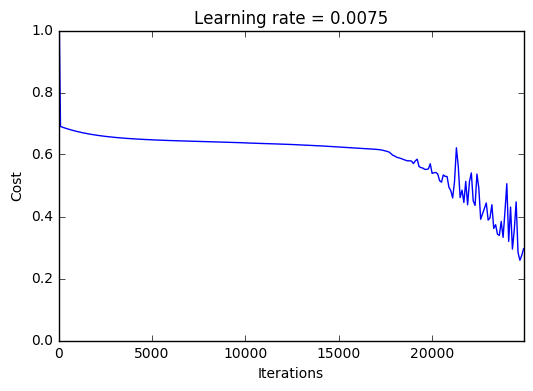

Train accuracy: 91.87%
Test accuracy: 68.00%


In [8]:
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model
four_layer_nn = model(train_x, train_y, test_x, test_y, layers_dims, learning_rate = 0.0075, num_iterations = 2500, initialization='he')

# Experimenting with dropout to reduce variance

Still 4 layer NN, Xavier initialization, will vary keep_prob number

## keep_prob = 0.7

Layer: 1
	W.shape = (20, 12288)
	b.shape = (20, 1)
	activation function = relu
	keep_prob: 0.7
	lambda: 0

Layer: 2
	W.shape = (7, 20)
	b.shape = (7, 1)
	activation function = relu
	keep_prob: 0.7
	lambda: 0

Layer: 3
	W.shape = (5, 7)
	b.shape = (5, 1)
	activation function = relu
	keep_prob: 0.7
	lambda: 0

Layer: 4
	W.shape = (1, 5)
	b.shape = (1, 1)
	activation function = sigmoid
	keep_prob: 1
	lambda: 0


Cost after iteration 0: 0.7890924681303725
Cost after iteration 100: 0.6749087555197347
Cost after iteration 200: 0.6573337501707824
Cost after iteration 300: 0.6406448911495786
Cost after iteration 400: 0.621529306457789
Cost after iteration 500: 0.5926199288082024
Cost after iteration 600: 0.5766151473095595
Cost after iteration 700: 0.509590434066496
Cost after iteration 800: 0.5112213680604971
Cost after iteration 900: 0.5003221807333939
Cost after iteration 1000: 0.4422912061670485
Cost after iteration 1100: 0.39357611126920367
Cost after iteration 1200: 0.3943214806206753
Co

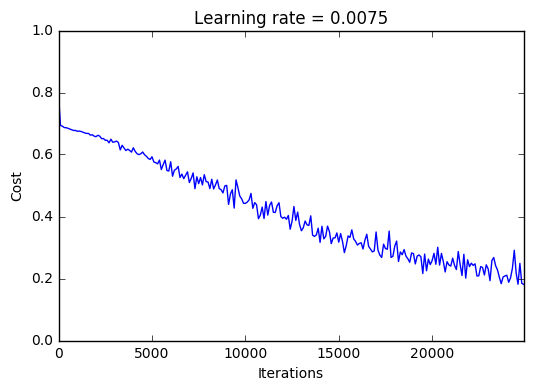

Train accuracy: 100.00%
Test accuracy: 78.00%


In [5]:
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model
four_layer_nn = model(train_x, train_y, test_x, test_y, layers_dims, learning_rate = 0.0075, num_iterations = 2500, initialization='xavier', keep_prob=0.7)

## keep_prob = 0.8

Layer: 1
	W.shape = (20, 12288)
	b.shape = (20, 1)
	activation function = relu
	keep_prob: 0.8
	lambda: 0

Layer: 2
	W.shape = (7, 20)
	b.shape = (7, 1)
	activation function = relu
	keep_prob: 0.8
	lambda: 0

Layer: 3
	W.shape = (5, 7)
	b.shape = (5, 1)
	activation function = relu
	keep_prob: 0.8
	lambda: 0

Layer: 4
	W.shape = (1, 5)
	b.shape = (1, 1)
	activation function = sigmoid
	keep_prob: 1
	lambda: 0


Cost after iteration 0: 0.7758239515640514
Cost after iteration 100: 0.6751012310019852
Cost after iteration 200: 0.6576120515763546
Cost after iteration 300: 0.6311096757644015
Cost after iteration 400: 0.6064169827823248
Cost after iteration 500: 0.562234578016387
Cost after iteration 600: 0.5362916843253702
Cost after iteration 700: 0.46230751715175833
Cost after iteration 800: 0.4488992768316139
Cost after iteration 900: 0.4628621238074759
Cost after iteration 1000: 0.34701517615844124
Cost after iteration 1100: 0.35399984197209033
Cost after iteration 1200: 0.3077766940360592

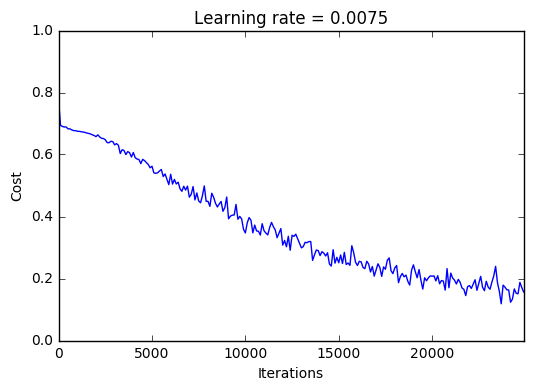

Train accuracy: 100.00%
Test accuracy: 82.00%


In [6]:
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model
four_layer_nn = model(train_x, train_y, test_x, test_y, layers_dims, learning_rate = 0.0075, num_iterations = 2500, initialization='xavier', keep_prob=0.8)

## keep_prob = 0.86

Layer: 1
	W.shape = (20, 12288)
	b.shape = (20, 1)
	activation function = relu
	keep_prob: 0.86
	lambda: 0

Layer: 2
	W.shape = (7, 20)
	b.shape = (7, 1)
	activation function = relu
	keep_prob: 0.86
	lambda: 0

Layer: 3
	W.shape = (5, 7)
	b.shape = (5, 1)
	activation function = relu
	keep_prob: 0.86
	lambda: 0

Layer: 4
	W.shape = (1, 5)
	b.shape = (1, 1)
	activation function = sigmoid
	keep_prob: 1
	lambda: 0


Cost after iteration 0: 0.7734555981387641
Cost after iteration 100: 0.6760837347188944
Cost after iteration 200: 0.658900620364611
Cost after iteration 300: 0.6271085561771845
Cost after iteration 400: 0.5987115197958105
Cost after iteration 500: 0.564293960452462
Cost after iteration 600: 0.5109496284917314
Cost after iteration 700: 0.4467006085904196
Cost after iteration 800: 0.4404346402514448
Cost after iteration 900: 0.4140666212928917
Cost after iteration 1000: 0.3312833902506823
Cost after iteration 1100: 0.3267428439269274
Cost after iteration 1200: 0.30983301421641385

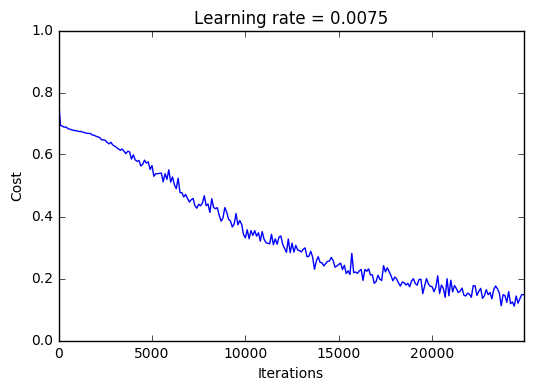

Train accuracy: 100.00%
Test accuracy: 78.00%


In [7]:
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model
four_layer_nn = model(train_x, train_y, test_x, test_y, layers_dims, learning_rate = 0.0075, num_iterations = 2500, initialization='xavier', keep_prob=0.86)

## keep_prob = 0.9

Layer: 1
	W.shape = (20, 12288)
	b.shape = (20, 1)
	activation function = relu
	keep_prob: 0.9
	lambda: 0

Layer: 2
	W.shape = (7, 20)
	b.shape = (7, 1)
	activation function = relu
	keep_prob: 0.9
	lambda: 0

Layer: 3
	W.shape = (5, 7)
	b.shape = (5, 1)
	activation function = relu
	keep_prob: 0.9
	lambda: 0

Layer: 4
	W.shape = (1, 5)
	b.shape = (1, 1)
	activation function = sigmoid
	keep_prob: 1
	lambda: 0


Cost after iteration 0: 0.779635914124756
Cost after iteration 100: 0.6761015425900349
Cost after iteration 200: 0.655625720310114
Cost after iteration 300: 0.6257827328502235
Cost after iteration 400: 0.6010395403418034
Cost after iteration 500: 0.5495514707185977
Cost after iteration 600: 0.4933915191534069
Cost after iteration 700: 0.4462236925471753
Cost after iteration 800: 0.4311637615148637
Cost after iteration 900: 0.40134610649431524
Cost after iteration 1000: 0.32523927719975043
Cost after iteration 1100: 0.31083037068177294
Cost after iteration 1200: 0.305824250843042
C

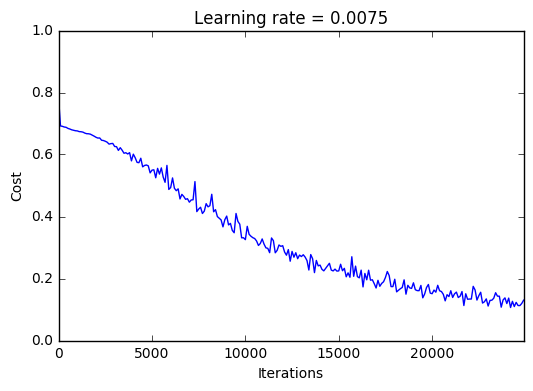

Train accuracy: 100.00%
Test accuracy: 78.00%


In [8]:
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model
four_layer_nn = model(train_x, train_y, test_x, test_y, layers_dims, learning_rate = 0.0075, num_iterations = 2500, initialization='xavier', keep_prob=0.9)

Dropout with keep_prob of 0.8 offers modest improvement in performance on dev set (from 80 to 82% accuracy)